In [1]:
import numpy as np 
import pandas as pd 
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
stop_words = stopwords.words('english')
df = pd.read_csv('../input/nlp-getting-started/train.csv')
df_test = pd.read_csv('../input/nlp-getting-started/test.csv')

In [3]:
texts = df['text']
texts_test = df_test['text']
y = df.pop('target')

In [4]:
def pre_process_data(text):
    lemm = WordNetLemmatizer()
    text  = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    tokenized = word_tokenize(text)
    text = [lemm.lemmatize(i.lower()) for i in tokenized if not(i.lower() in stop_words) and i.isalpha()]
    text = [i.replace('http','') for i in text]
    text = [i.replace('co','') for i in text]
    text = [i.replace('amp','') for i in text]
    return ' '.join(text)

In [5]:
texts_test = [pre_process_data(i) for i in texts_test]
texts = [pre_process_data(i) for i in texts]

In [6]:
wordcloud = WordCloud(stopwords=stop_words,
                      background_color="black",
                      width=1600, height=800).generate(' '.join(texts))

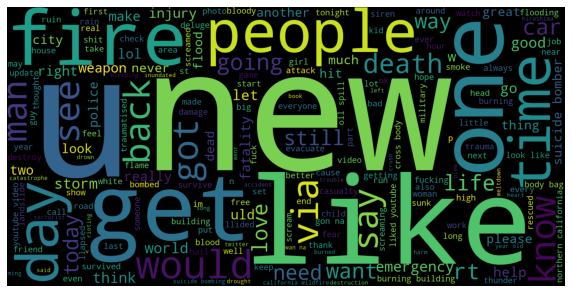

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)

In [8]:
vectorizer = CountVectorizer(max_features=10000)
vectorizer2 = TfidfTransformer()
x = vectorizer.fit_transform(texts)
x = vectorizer2.fit_transform(x,y)

In [9]:
x  = x.toarray()

In [10]:
clf = RandomForestClassifier(n_estimators=250)
clf.fit(x,y)

RandomForestClassifier(n_estimators=250)

In [11]:
x_test = vectorizer.transform(texts_test)
x_test = vectorizer2.transform(x_test)
y_test = clf.predict(x_test)
ids = df_test['id']
res = pd.DataFrame(data = ids)
res['target'] = y_test
res.to_csv('submission.csv',index = False)